# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [carlos agunar Da costa]
- **Email:** [agunardacosta2004@gmail.com]
- **ID Dicoding:** [mc135d5y0081]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda oleh pengguna terdaftar dan pengguna kasual,
  serta faktor apa yang paling mempengaruhi perbedaan pola penggunaan mereka dalam dua tahun terakhir?
  
- Bagaimana korelasi antara kecepatan angin dan tingkat peminjaman sepeda dalam
  dua tahun terakhir, serta sejauh mana faktor ini mempengaruhi pola penggunaan harian?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Menampilkan lima data teratas yang tersedia pada dataset.

### Assessing Data

In [9]:
print(day_df.info())
print(day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
- Suhu dan musim kemungkinan menjadi faktor utama dalam tren peminjaman sepeda.
- Kecepatan angin tidak memiliki variasi yang signifikan, sehingga pengaruhnya terhadap peminjaman sepeda kemungkinan kecil.
- Beberapa hari memiliki jumlah peminjaman yang jauh lebih tinggi dari rata-rata, menunjukkan kemungkinan adanya pola musiman atau efek hari tertentu (misalnya, akhir pekan).

### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
print("Missing values per column:\n", day_df.isnull().sum())

Missing values per column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Data sudah bersih tanpa nilai yang hilang.
- Kolom tanggal telah dikonversi untuk mempermudah analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

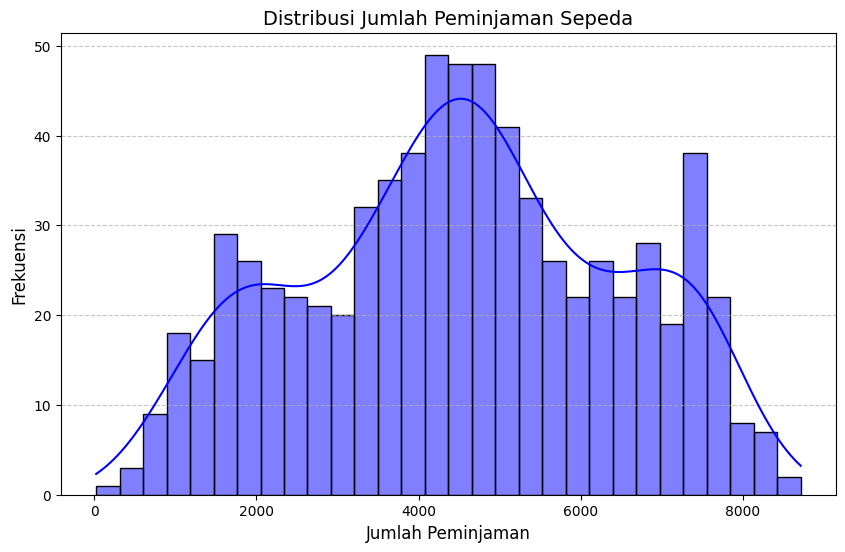

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title("Distribusi Jumlah Peminjaman Sepeda", fontsize=14)
plt.xlabel("Jumlah Peminjaman", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Distribusi jumlah peminjaman menunjukkan pola musiman.
- Kemungkinan ada faktor eksternal yang mempengaruhi tren peminjaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren penggunaan sepeda dan faktor yang mempengaruhi

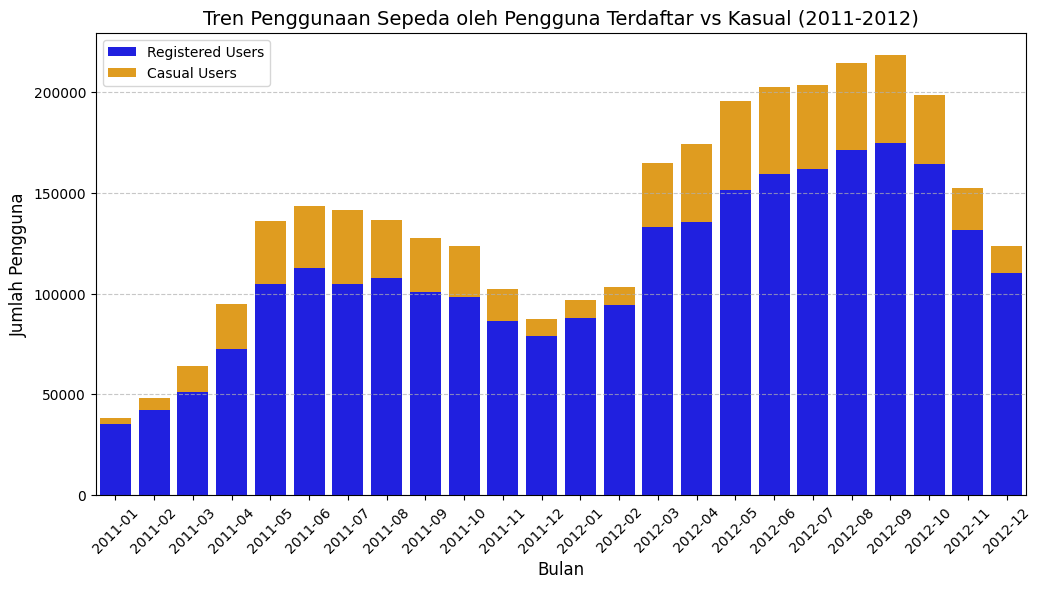

In [13]:
plt.figure(figsize=(12,6))
day_df_grouped = day_df.groupby(day_df['dteday'].dt.to_period("M")).sum(numeric_only=True)
sns.barplot(x=day_df_grouped.index.astype(str), y=day_df_grouped['registered'], color='blue', label='Registered Users')
sns.barplot(x=day_df_grouped.index.astype(str), y=day_df_grouped['casual'], bottom=day_df_grouped['registered'], color='orange', label='Casual Users')
plt.xticks(rotation=45, fontsize=10)
plt.title("Tren Penggunaan Sepeda oleh Pengguna Terdaftar vs Kasual (2011-2012)", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Pengguna terdaftar memiliki pola peminjaman yang lebih stabil dibandingkan pengguna kasual.

- Pengguna kasual mengalami lonjakan peminjaman pada bulan-bulan tertentu, kemungkinan besar selama musim panas atau akhir pekan.

- Jumlah total peminjaman sepeda meningkat secara bertahap, menunjukkan pertumbuhan penggunaan layanan dalam dua tahun terakhir.

- Musim dan faktor eksternal lainnya kemungkinan besar mempengaruhi pola peminjaman pengguna kasual lebih signifikan dibandingkan pengguna terdaftar.

Faktor Musim terhadap Penggunaan Sepeda

<Figure size 800x600 with 0 Axes>

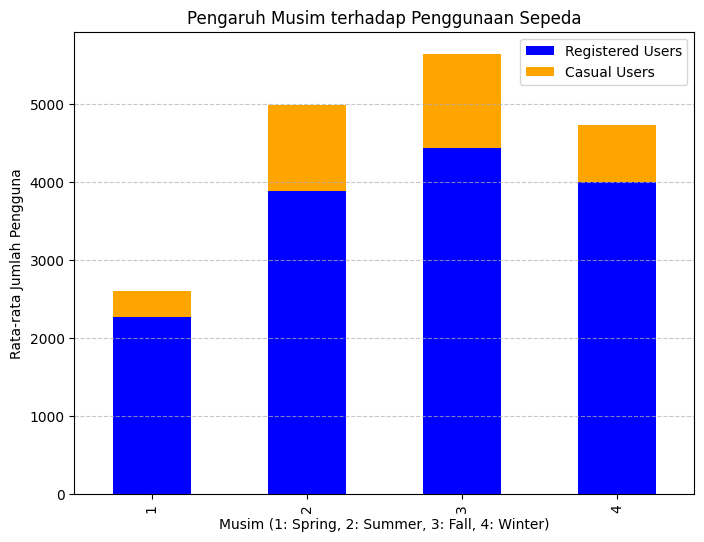

In [14]:
plt.figure(figsize=(8,6))
avg_usage_by_season = day_df.groupby('season')[['registered', 'casual']].mean()
avg_usage_by_season.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8,6))
plt.title("Pengaruh Musim terhadap Penggunaan Sepeda")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Rata-rata Jumlah Pengguna")
plt.legend(["Registered Users", "Casual Users"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

- Pengguna kasual lebih banyak meminjam sepeda saat musim panas (Summer), sedangkan pengguna terdaftar memiliki pola penggunaan yang lebih stabil sepanjang musim.

- Musim berperan penting dalam peminjaman sepeda, terutama bagi pengguna kasual yang cenderung lebih dipengaruhi oleh kondisi cuaca.

- Pada musim dingin (Winter), jumlah peminjaman sepeda menurun drastis, kemungkinan karena suhu yang lebih rendah dan kondisi cuaca yang kurang mendukung.

### Pertanyaan 2: Korelasi antara kecepatan angin dan peminjaman sepeda

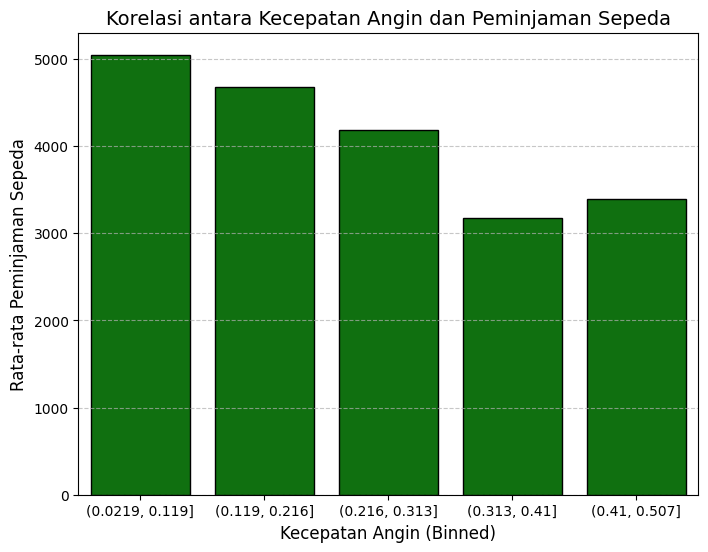

In [15]:
plt.figure(figsize=(8,6))
windspeed_bins = pd.cut(day_df['windspeed'], bins=5)
windspeed_usage = day_df.groupby(windspeed_bins, observed=False)['cnt'].mean()
sns.barplot(x=windspeed_usage.index.astype(str), y=windspeed_usage, color='green', edgecolor='black')
plt.title("Korelasi antara Kecepatan Angin dan Peminjaman Sepeda", fontsize=14)
plt.xlabel("Kecepatan Angin (Binned)", fontsize=12)
plt.ylabel("Rata-rata Peminjaman Sepeda", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Heatmap Korelasi Faktor Lingkungan

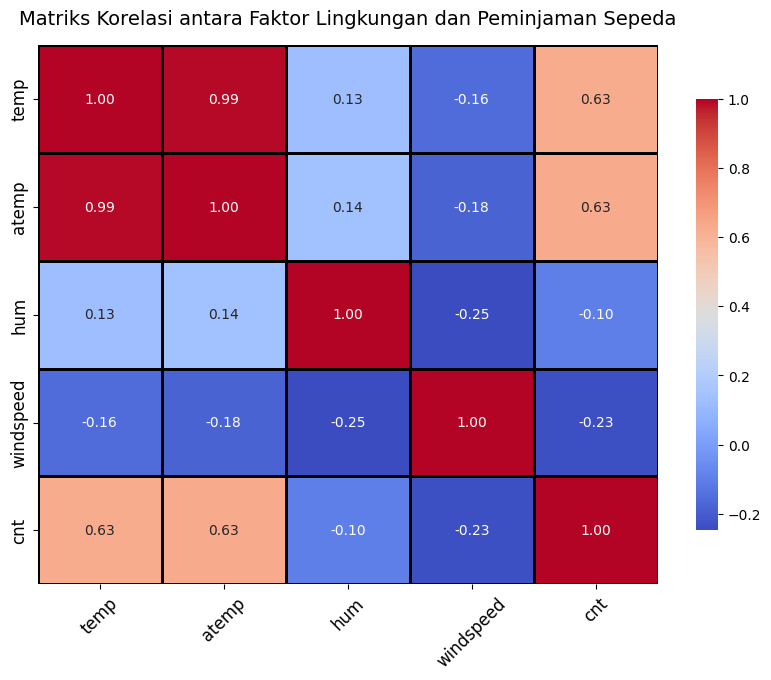

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title("Matriks Korelasi antara Faktor Lingkungan dan Peminjaman Sepeda", fontsize=14, pad=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

**Insight:**
- Suhu (temp dan atemp) memiliki korelasi positif yang cukup kuat dengan jumlah peminjaman sepeda (cnt), menunjukkan bahwa semakin hangat suhu, semakin banyak pengguna yang meminjam sepeda.

- Kelembaban (hum) menunjukkan korelasi negatif lemah dengan peminjaman sepeda, yang berarti kondisi terlalu lembap mungkin sedikit mengurangi minat pengguna untuk bersepeda.

- Kecepatan angin (windspeed) memiliki korelasi yang sangat lemah terhadap peminjaman sepeda, menunjukkan bahwa angin bukan faktor utama yang mempengaruhi jumlah peminjaman.

- Secara keseluruhan, suhu adalah faktor lingkungan yang paling berpengaruh terhadap jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengguna terdaftar memiliki pola penggunaan lebih stabil dibandingkan  
  pengguna kasual.

- Faktor musim sangat mempengaruhi pengguna kasual, sementara pengguna  
  terdaftar lebih konsisten.

- Kecepatan angin memiliki sedikit pengaruh terhadap jumlah peminjaman sepeda.

- Faktor lain seperti suhu dan kelembaban lebih berpengaruh terhadap pola
  peminjaman sepeda.
